In [43]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [11]:
for dirname, _, filenames in os.walk('/content/Bitcoin Historical Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [44]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotCorrelationMatrix(df, graphWidth, filename=""):
    df = df.dropna(axis=1)  # Xóa cột chứa NaN
    df = df.select_dtypes(include=['number'])  # Giữ cột số

    if df.shape[1] < 2:
        print(f'Không có đủ cột số để vẽ ma trận tương quan ({df.shape[1]} cột)')
        return

    corr = df.corr()

    plt.figure(figsize=(graphWidth, graphWidth), dpi=80)
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()




In [46]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Giữ lại cột số
    df = df.dropna(axis=1)  # Xóa cột chứa NaN
    df = df[[col for col in df if df[col].nunique() > 1]]  # Chỉ giữ cột có nhiều hơn 1 giá trị duy nhất

    # Nếu không còn cột nào hợp lệ, thông báo và thoát
    if df.shape[1] < 2:
        print(f'⚠️ Không thể vẽ Scatter Matrix: DataFrame chỉ còn {df.shape[1]} cột số hợp lệ.')
        print(f'📊 Dữ liệu còn lại:\n{df.head()}')
        return

    sns.pairplot(df, height=plotSize/10, plot_kws={'s': textSize})
    plt.show()


In [47]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Bitcoin Historical Data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/Bitcoin Historical Data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Bitcoin Historical Data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [48]:
df1.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [49]:
df1["Price"] = df1["Price"].str.replace(",", "").astype(float)
df1["Open"] = df1["Open"].str.replace(",", "").astype(float)
df1["High"] = df1["High"].str.replace(",", "").astype(float)
df1["Low"] = df1["Low"].str.replace(",", "").astype(float)

In [50]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

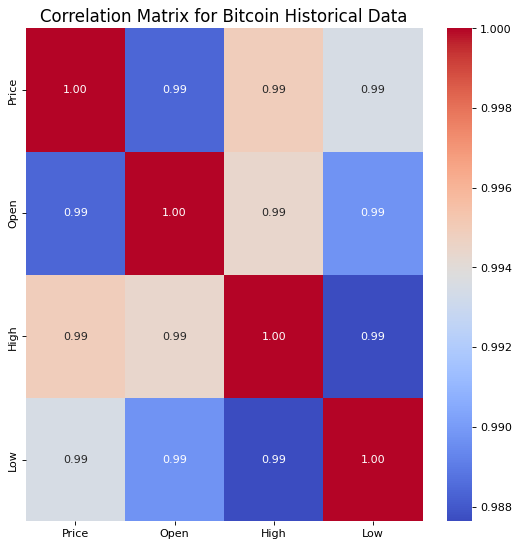

In [54]:

plotCorrelationMatrix(df1, 8, filename="Bitcoin Historical Data")

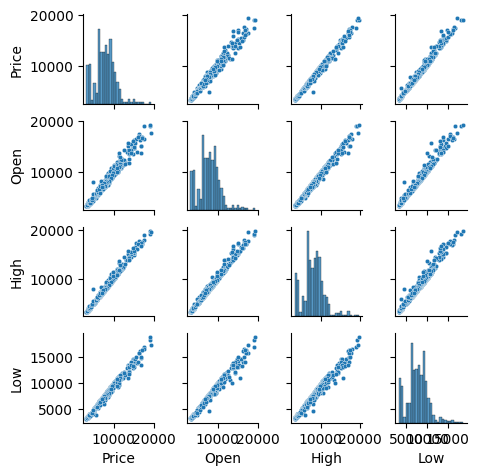

In [52]:
plotScatterMatrix(df1, 12, 10)